In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join, vstack
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
import scipy.stats as stats
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
# import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



/home/sanchez/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/tmp/ipykernel_20292/3096247204.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2.2.0
2.2.0


In [2]:

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)

In [3]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
f = open('colortables/CLC_vmap.csv', 'w')
for i in range(color_cm_now.N):
    val=color_cm_now(i)
    val_str=f'{val[0]},{val[1]},{val[2]},{val[3]}\n'
#    f.write("Hello, World!\n")
#    print(val_str)
    f.write(val_str);
f.close()
#color_list = [mcolors.rgb2hex(color_cm_now(i)) for i in range(color_cm_now.N)]
#print(color_list)

In [4]:
from matplotlib import rcParams as rc
rc.update({'font.size': 18,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 18,\
           'ytick.labelsize' : 18,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [20]:
##########################################################################
# We read the KG-Pipe3D catalog
##########################################################################
hdu = fits.open('tables/PS_img_barycenter.fits')
tab = Table(hdu[1].data)


In [21]:
tab.colnames

['name', 'RA_img', 'DEC_img', 'RA_cube', 'DEC_cube', 'dRA', 'dDEC', 'delta']

In [25]:
mKG_manga = np.array(['MaNGA' in name for name in tab['name']])
mKG_sami = ~mKG_manga

Mean RA, DEC for MaNGA: 0.0703804272741785 -0.08313075780388324
Mean RA, DEC for SAMI: 0.12642597659905247 -0.14464977016549171
STD =  0.7221117296449513


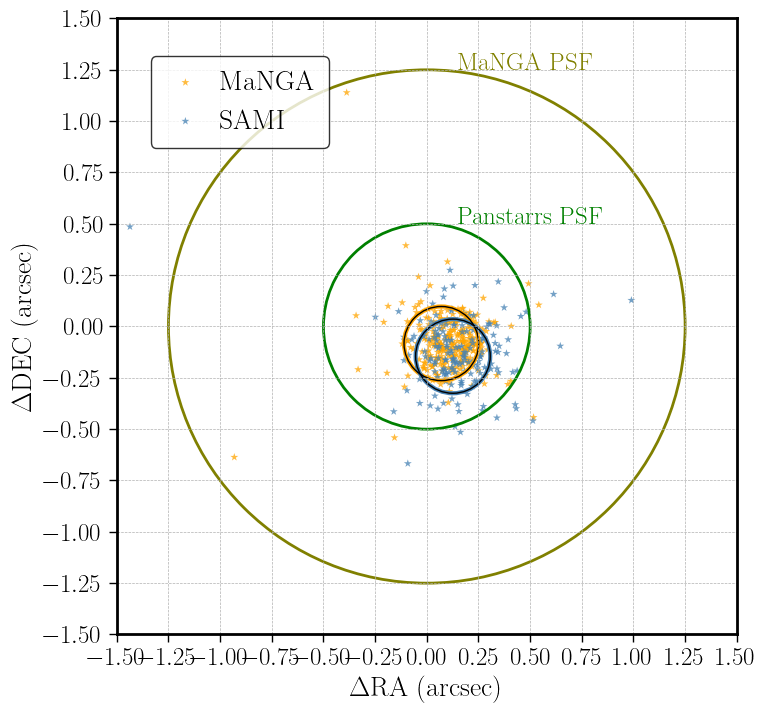

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))
#ax.scatter(tab['dRA'].value, tab['dDEC'].value, c='k', marker='*',)
ax.scatter(tab['dRA'].value[mKG_manga], tab['dDEC'].value[mKG_manga], c='orange', edgecolor='None', marker='*',alpha=0.75, label='MaNGA')
ax.scatter(tab['dRA'].value[mKG_sami], tab['dDEC'].value[mKG_sami], c='steelblue', edgecolor='None', marker='*',alpha=0.75, label='SAMI')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(np.arange(-1.5, 1.75, 0.25))
ax.set_yticks(np.arange(-1.5, 1.75, 0.25))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel(r'$\Delta$RA (arcsec)', fontsize=20)
ax.set_ylabel(r'$\Delta$DEC (arcsec)', fontsize=20)
circle = plt.Circle((0, 0), 1.25, color='olive', fill=False, linewidth=2)
ax.text(0.15,1.25,'MaNGA PSF',color='olive')
ax.text(0.15,0.5,'Panstarrs PSF',color='green')

ax.add_artist(circle)
circle1 = plt.Circle((0, 0), 0.5, color='green', fill=False, linewidth=2)
ax.add_artist(circle1)

Dx = np.nanmean(tab['dRA'].value)
Dy = np.nanmean(tab['dDEC'].value)

Dx_ss = np.nanstd(tab['dRA'].value)
Dy_ss = np.nanstd(tab['dDEC'].value)

Dx_m = np.nanmean(tab['dRA'].value[mKG_manga])
Dy_m = np.nanmean(tab['dDEC'].value[mKG_manga])

Dx_s = np.nanmean(tab['dRA'].value[mKG_sami])
Dy_s = np.nanmean(tab['dDEC'].value[mKG_sami])

circle_3 = plt.Circle((Dx_m, Dy_m), 0.25*np.sqrt(Dx_ss**2+Dy_ss**2), color='orange', fill=False, linewidth=3)
circle_4 = plt.Circle((Dx_s, Dy_s), 0.25*np.sqrt(Dx_ss**2+Dy_ss**2), color='steelblue', fill=False, linewidth=3)
ax.add_artist(circle_3)
ax.add_artist(circle_4)

circle_5 = plt.Circle((Dx_m, Dy_m), 0.25*np.sqrt(Dx_ss**2+Dy_ss**2), color='k', fill=False, linewidth=1)
circle_6 = plt.Circle((Dx_s, Dy_s), 0.25*np.sqrt(Dx_ss**2+Dy_ss**2), color='k', fill=False, linewidth=1)
ax.add_artist(circle_5)
ax.add_artist(circle_6)


fig.legend(loc='upper left', fontsize=20, frameon=True, handlelength=1.5, handletextpad=0.5, borderpad=0.5, bbox_to_anchor=(0.15, 0.85), 
           facecolor='white', edgecolor='black')

#ax.scatter(Dx_m, Dy_m, marker='o', s=200, color='orange',edgecolor='k')
#ax.scatter(Dx_s, Dy_s, marker='o', s=200, color='steelblue',edgecolor='k')
print('Mean RA, DEC for MaNGA:',Dx_m, Dy_m)
print('Mean RA, DEC for SAMI:',Dx_s, Dy_s)
print('STD = ',np.sqrt(Dx_ss**2+Dy_ss**2))

